In [10]:
import pandas as pd
file_names = {
    "primary_cohort": "data/s41598-020-73558-3_sepsis_survival_primary_cohort.csv",
    "study_cohort": "data/s41598-020-73558-3_sepsis_survival_study_cohort.csv",
    "validation_cohort": "data/s41598-020-73558-3_sepsis_survival_validation_cohort.csv",
}
dict_df = dict()
for key, file in file_names.items():
    dict_df[key] = pd.read_csv(file)

### **Dataset information**

#### **What do the instances in this dataset represent?**

For the primary cohort, they represent records of patients affected by sepsis potential preconditions (ante Sepsis-3 definition); for the study cohort, they represent only the patients’ admissions defined by the novel Sepsis-3 definition.

#### **Are there recommended data splits?**

No recommendation, standard train-test split could be used. Can use three-way holdout split (i.e., training, validation/development, testing) when doing model selection.

#### **Does the dataset contain data that might be considered sensitive in any way?**

Yes. It contains information about the gender and age of the patient.

#### **Was there any data preprocessing performed?**

All the categorical variables have been encoded (so no preprocessing is necessary).

#### **Additional Information**

Primary cohort from Norway:
- 4 features for 110,204 patient admissions
- file: 's41598-020-73558-3_sepsis_survival_primary_cohort.csv'

Study cohort (a subset of the primary cohort) from Norway:
- 4 features for 19,051 patient admissions
- file: 's41598-020-73558-3_sepsis_survival_study_cohort.csv'

Validation cohort from South Korea:
- 4 features for 137 patients
- file: 's41598-020-73558-3_sepsis_survival_validation_cohort.csv'

The validation cohort from South Korea was used by Chicco and Jurman (2020) as an external validation cohort to confirm the generalizability of their proposed approach. 

#### **Has Missing Values?**

No

In [12]:
dict_df["primary_cohort"]

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1


In [13]:
dict_df["study_cohort"]

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1
...,...,...,...,...
19046,33,1,1,1
19047,58,0,1,1
19048,44,0,2,1
19049,61,0,3,0


In [14]:
dict_df["validation_cohort"]

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,20,0,1,1
1,22,0,1,1
2,26,1,2,0
3,33,1,1,1
4,33,0,1,1
...,...,...,...,...
132,47,0,1,1
133,50,0,1,0
134,62,0,1,1
135,58,0,1,0


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

/home/guillaumereynier/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


/home/guillaumereynier/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:07:33] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.9264273529091503

Rapport de classification primary :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8105
           1       0.93      1.00      0.96    102099

    accuracy                           0.93    110204
   macro avg       0.46      0.50      0.48    110204
weighted avg       0.86      0.93      0.89    110204

Accuracy : 0.8107185974489528

Rapport de classification test :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3606
           1       0.81      1.00      0.90     15445

    accuracy                           0.81     19051
   macro avg       0.41      0.50      0.45     19051
weighted avg       0.66      0.81      0.73     19051



/home/guillaumereynier/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/guillaumereynier/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/guillaumereynier/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

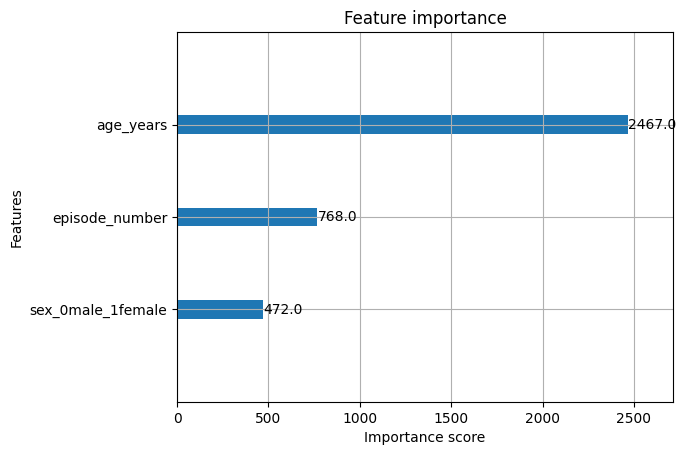

In [21]:
Xtrain = dict_df["study_cohort"].drop(columns=["hospital_outcome_1alive_0dead"])
ytrain = dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]

model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",  # ou "auc" si tu préfères
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

# === 5. Entraînement ===
model.fit(Xtrain, ytrain)

X_val_primary = dict_df["primary_cohort"].drop(columns=["hospital_outcome_1alive_0dead"])
X_val_test = dict_df["study_cohort"].drop(columns=["hospital_outcome_1alive_0dead"])
y_val_primary = dict_df["primary_cohort"]["hospital_outcome_1alive_0dead"]
y_val_test = dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]

# === 6. Prédiction et évaluation ===
y_pred_primary = model.predict(X_val_primary)
y_pred_test= model.predict(X_val_test)

print("Accuracy :", accuracy_score(y_val_primary, y_pred_primary))
print("\nRapport de classification primary :\n", classification_report(y_val_primary, y_pred_primary))
print("Accuracy :", accuracy_score(y_val_test, y_pred_test))

print("\nRapport de classification test :\n", classification_report(y_val_test, y_pred_test))

# === 7. Importance des features ===
xgb.plot_importance(model)
